In [1]:
%matplotlib notebook
import numpy as np

import dyrect as dy
from dyrect.data_generators import lemniscate, lorenz_attractor
from dyrect.drawing import *

import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import random
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


/tmp/ipykernel_4902/2959723178.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [ ]:
points = lemniscate(2000, scale=2., step=0.26, noise=0.15)

eps=0.5
EN = dy.EpsilonNet(eps, 0)
dists = EN.fit(points)
lms = EN.landmarks
print(lms.shape)

plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
plt.scatter(points[:,0],points[:,1], s=0.5)
plt.xlim((-3.4,3.4))
plt.ylim((-1.75,1.75))
plt.savefig('ball_mapper_1.pdf', format='pdf')
# plt.scatter(lms[:,0],lms[:,1], s=21.9)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
plt.scatter(points[:,0],points[:,1], s=0.5)
plt.scatter(lms[:,0],lms[:,1], s=21.9)

for lm in lms:
    crc = plt.Circle(lm, eps, color='r', alpha=0.1)
    ax.add_patch(crc)
plt.xlim((-3.4,3.4))
plt.ylim((-1.75,1.75))
plt.savefig('ball_mapper_2.pdf', format='pdf')

complex = dy.NerveComplex(lms, eps, 2, points)
dy.draw_complex(complex)
plt.xlim((-3.4,3.4))
plt.ylim((-1.75,1.75))
plt.savefig('ball_mapper_3.pdf', format='pdf')

In [ ]:
fig = plt.figure(figsize=(10,8))
complex = dy.NerveComplex(lms, eps, 2, points)
dy.draw_complex(complex, circles=False)
plt.xlim((-3.4,3.4))
plt.ylim((-1.75,1.75))
plt.savefig('ball_mapper_4.pdf', format='pdf')

In [ ]:
TM = dy.TransitionMatrix(lms, eps)
transitions = TM.fit(points)
prob_matrix = dy.trans2prob(transitions)

In [ ]:
# Questions: 
# how to count transitions? if point is in the intersection of balls, should it contribute to both? 
# if it maps to the the intersection, it should be counted twice? it may create fake backward loops
draw_transition_graph(prob_matrix, lms, threshold=0.15)
plt.show()

<IPython.core.display.Javascript object>


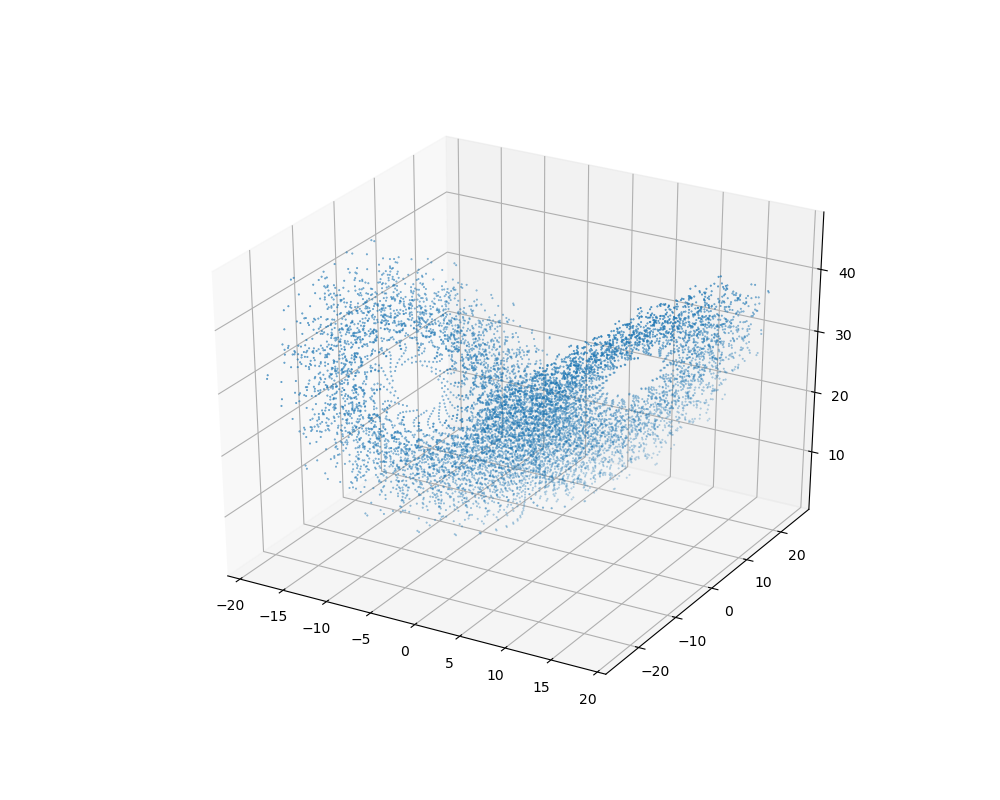

In [3]:
points = lorenz_attractor(10000, step=0.01, adaptive_step=True)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=0.2)
fig.savefig('lorenz_3d.png', format='png')

In [ ]:
emb_lorenz = dy.embedding(points[:,0], 3, 2)

fig = plt.figure(figsize=(10,8))
plt.plot(points[:2000,0])
# fig.savefig('lorenz_z.pds', format='pdf')

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(emb_lorenz[:,0], emb_lorenz[:,1], emb_lorenz[:,2], s=0.2)
# fig.savefig('lorenz_emb_z.pds', format='pdf')

In [ ]:
eps=2.
EN = dy.EpsilonNet(eps, 0)
EN.fit(emb_lorenz)
lms = EN.landmarks
print(lms.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(emb_lorenz[:,0], emb_lorenz[:,1], emb_lorenz[:,2], s=0.2)
ax.scatter(lms[:,0], lms[:,1], lms[:,2], s=5.2)

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
plt.scatter(emb_lorenz[:,0], emb_lorenz[:,1], s=0.2)
plt.scatter(lms[:,0], lms[:,1], s=5.2)

for lm in lms:
    crc = plt.Circle(lm, eps, color='r', alpha=0.05)
    ax.add_patch(crc)
fig.savefig('lorenz_emb_ballz.pdf', format='pdf')

In [ ]:
TM = dy.TransitionMatrix(lms, eps)
transitions = TM.fit(emb_lorenz)
prob_matrix = dy.trans2prob(transitions)

# Questions: 
# how to count transitions? if point is in the intersection of balls, should it contribute to both? 
# if it maps to the the intersection, it should be counted twice? it may create fake backward loops
draw_transition_graph(prob_matrix, lms, threshold=0.2, node_size=10, edge_size=8)
plt.show()
plt.savefig('lorenz_emb_graph.pdf', format='pdf')

## Future prediction

(181, 3)


<IPython.core.display.Javascript object>


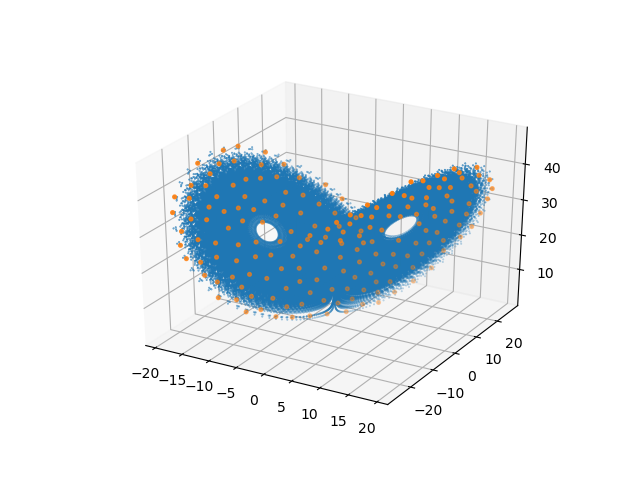

In [40]:
np.random.seed(0)
random.seed(0)

train_points = lorenz_attractor(200000, step=0.01, adaptive_step=False, starting_point=[1.,1.,1.])
test_points = lorenz_attractor(5000, step=0.01, adaptive_step=False, starting_point=[-1.,-1.,1.])

eps=3.2
EN = dy.EpsilonNet(eps, 0)
dists = EN.fit(train_points)
lms = EN.landmarks
print(lms.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train_points[:,0], train_points[:,1], train_points[:,2], s=0.2)
ax.scatter(lms[:,0], lms[:,1], lms[:,2], s=7.2)

In [41]:
seer = dy.Seer(train_points, lms, eps)
nc = dy.NerveComplex(lms, eps, 3, train_points)

<IPython.core.display.Javascript object>


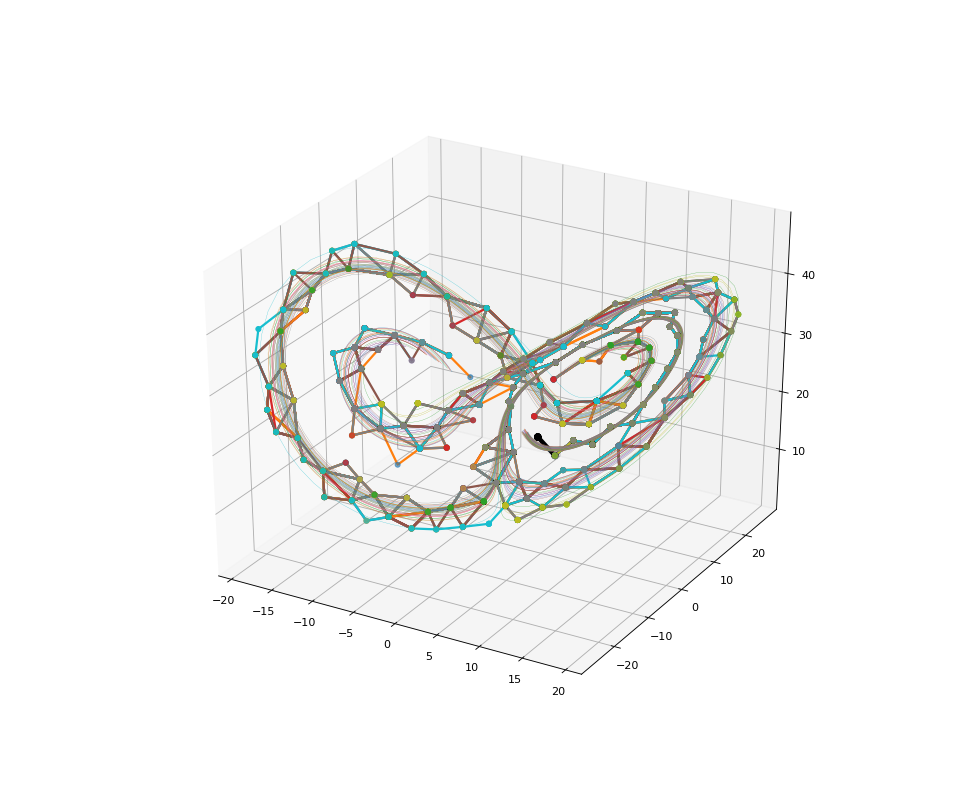

T:  0  components:  1
T:  105  components:  3
T:  114  components:  4
T:  115  components:  5
T:  116  components:  6
T:  117  components:  7
T:  118  components:  8
T:  119  components:  10
T:  120  components:  11
T:  121  components:  13
T:  123  components:  15
T:  130  components:  18
T:  133  components:  19
T:  60


<IPython.core.display.Javascript object>


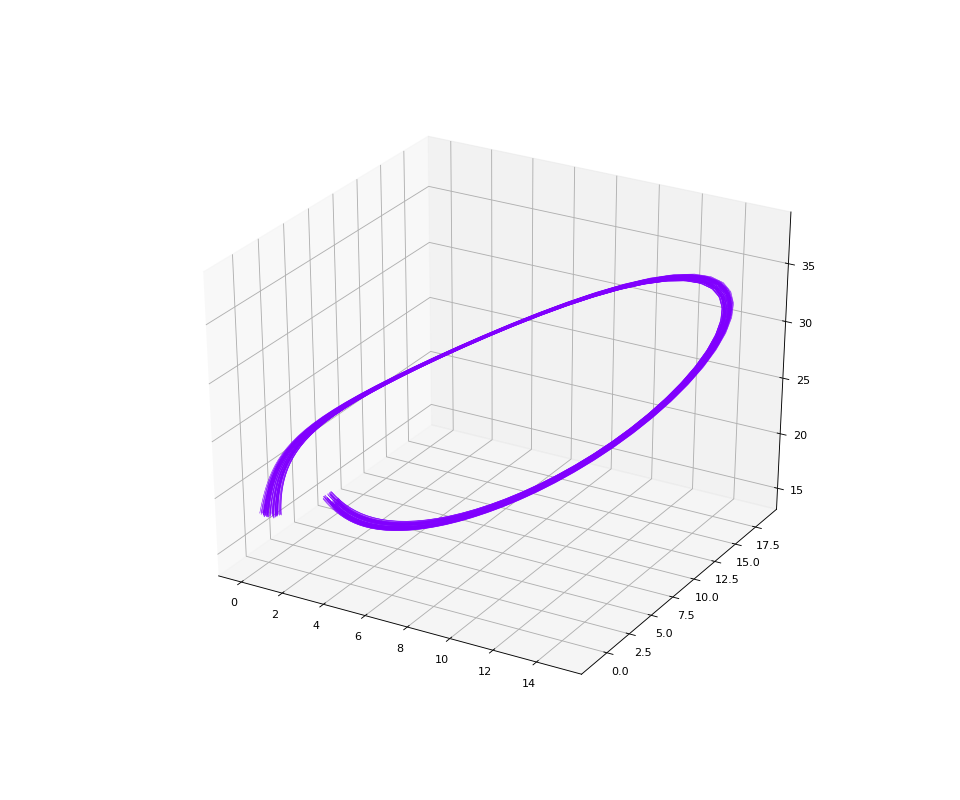

T:  89


<IPython.core.display.Javascript object>


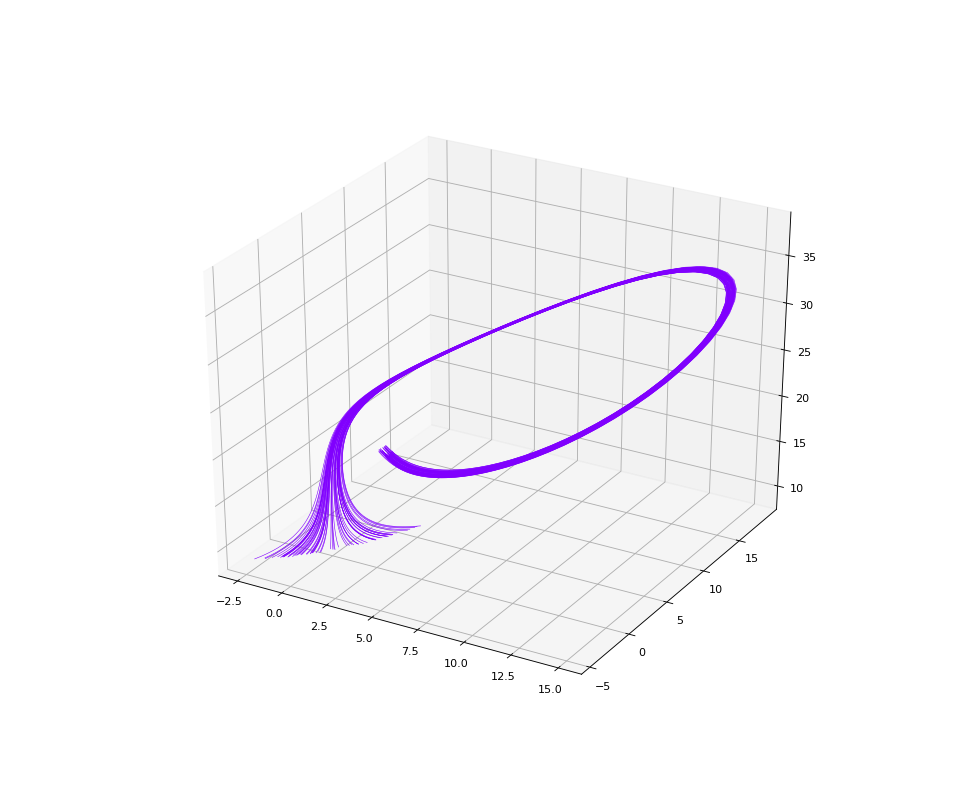

T:  125


<IPython.core.display.Javascript object>


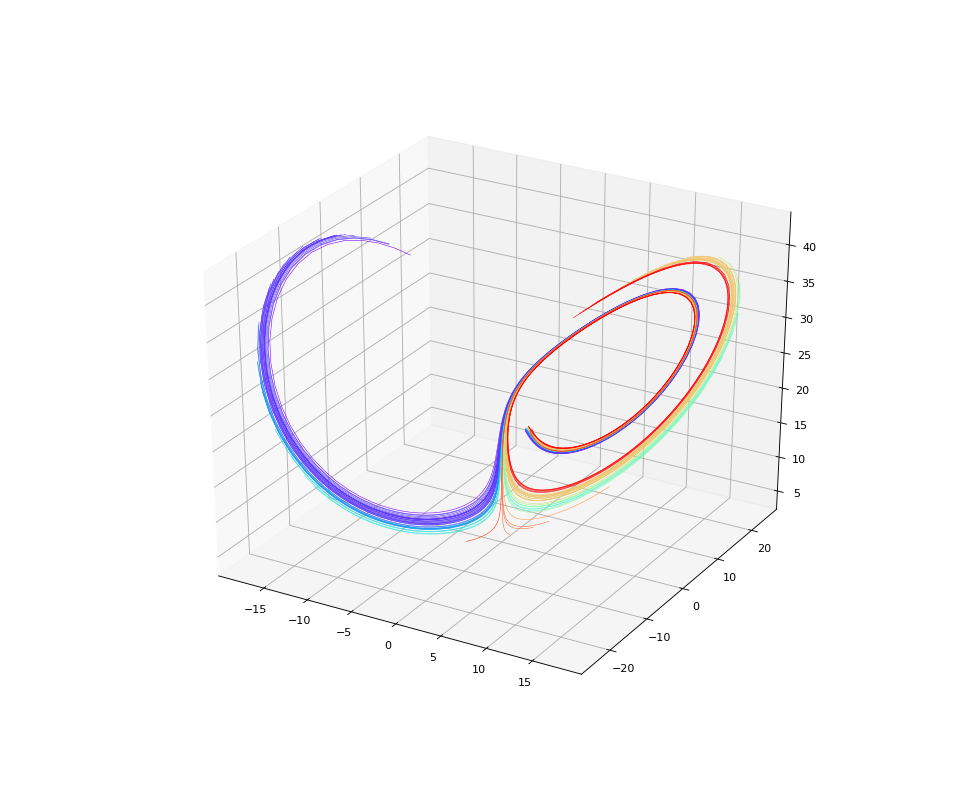

T:  199


<IPython.core.display.Javascript object>


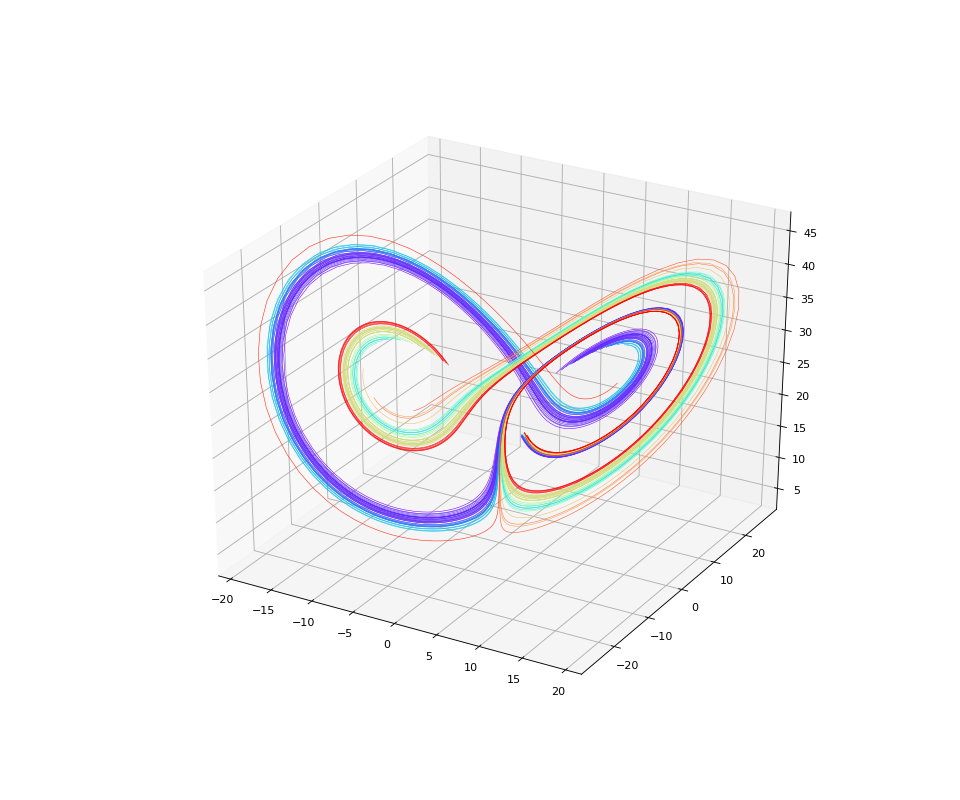

(<Figure size 960x800 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fe1be476a60>)

In [64]:
# t0 = 1230
t0 = 3530
t1 = t0 + 15
tpredict = 200
# t0 = 3960
# t1 = t0 + 15
# tpredict = 150
# t0 = 1993
# t1 = t0 + 10
# tpredict = 100
prediction = seer.predict(test_points[t0:t1], tpredict)

seer.draw_prediction()
seer.draw_hom_grouped_prediction(nc, steps=[60, 89, 125, tpredict-1], prediction=prediction)

## Future prediction 2D

In [1]:
%matplotlib notebook
import numpy as np

import dyrect as dy
from dyrect.data_generators import lemniscate, lorenz_attractor
from dyrect.drawing import *

import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import random
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


/tmp/ipykernel_29797/2959723178.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [65]:
np.random.seed(0)
random.seed(0)

train_points = lorenz_attractor(200000, step=0.01, adaptive_step=False, starting_point=[1.,1.,1.])[:,:2]
test_points = lorenz_attractor(5000, step=0.01, adaptive_step=False, starting_point=[-1.,-1.,1.])[:,:2]

eps=3.2
EN = dy.EpsilonNet(eps, 0)
dists = EN.fit(train_points)
lms = EN.landmarks
print(lms.shape)

(62, 2)


<IPython.core.display.Javascript object>


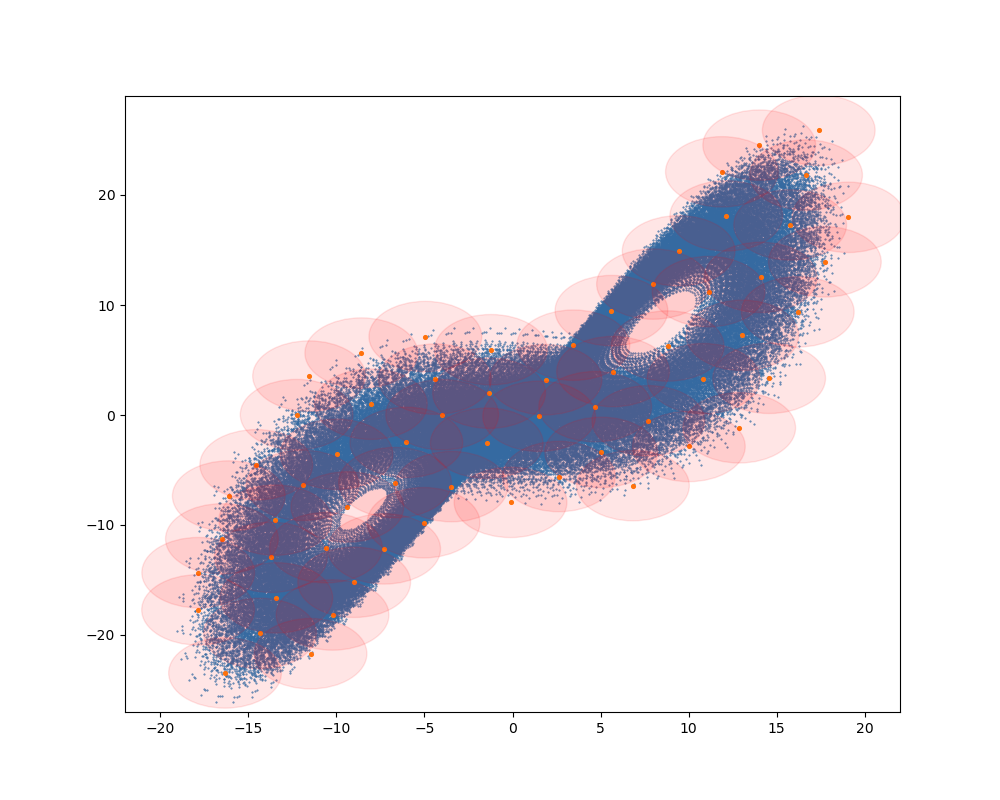

In [26]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
ax.scatter(train_points[:,0], train_points[:,1], s=0.2)
ax.scatter(lms[:,0], lms[:,1], s=7.2)
plt.xlim((-22,22))
plt.ylim((-27,29))
fig.savefig('lorenz_2d_pred_1.pdf', format='pdf')
fig.savefig('lorenz_2d_pred_1.png', format='png')
for lm in lms:
    crc = plt.Circle(lm, eps, color='r', alpha=0.1)
    ax.add_patch(crc)

fig.savefig('lorenz_2d_pred_2_dense.pdf', format='pdf')
fig.savefig('lorenz_2d_pred_2.png', format='png')

In [27]:
seer = dy.Seer(train_points, lms, eps)
nc = dy.NerveComplex(lms, eps, 2, train_points)

<IPython.core.display.Javascript object>


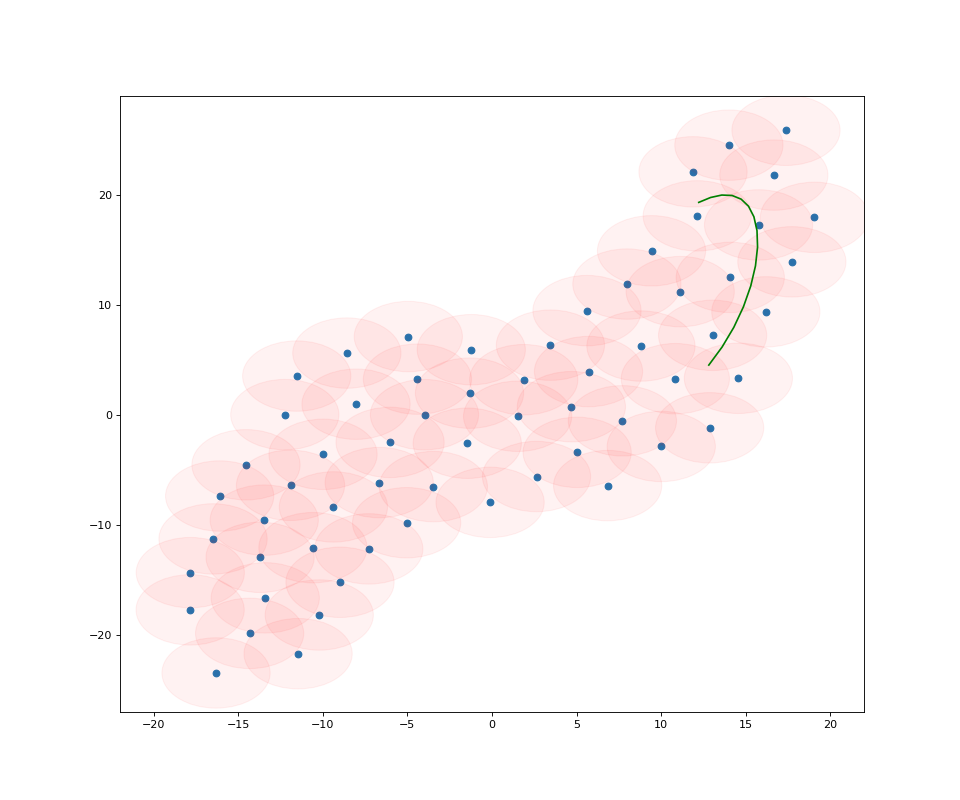

In [30]:
t0 = 1590
t1 = t0 + 15
tpredict = 0
# t0 = 3960
# t1 = t0 + 15
# tpredict = 150
# t0 = 1993
# t1 = t0 + 10
# tpredict = 100
prediction = seer.predict(test_points[t0:t1], tpredict)

fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot()
ax.plot(test_points[t0:t1,0], test_points[t0:t1,1], c='g')
ax.scatter(lms[:,0], lms[:,1])
for lm in lms:
    crc = plt.Circle(lm, eps, color='r', alpha=0.05)
    ax.add_patch(crc)

plt.xlim((-22,22))
plt.ylim((-27,29))
fig.savefig('lorenz_2d_pred_3.pdf', format='pdf')

<IPython.core.display.Javascript object>


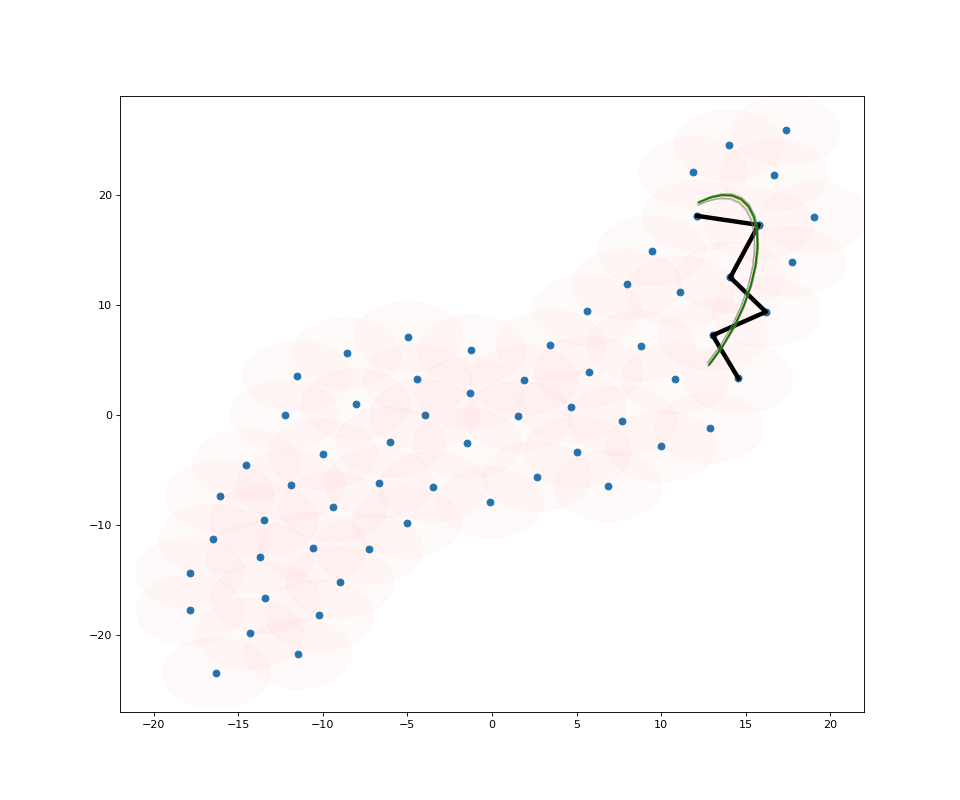

/tmp/ipykernel_29797/3636690065.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


In [31]:
fig, ax = seer.draw_prediction()
ax = fig.add_subplot()
ax.plot(test_points[t0:t1,0], test_points[t0:t1,1], c='g')
ax.scatter(lms[:,0], lms[:,1])
for lm in lms:
    crc = plt.Circle(lm, eps, color='r', alpha=0.02)
    ax.add_patch(crc)
    
plt.xlim((-22,22))
plt.ylim((-27,29))
fig.savefig('lorenz_2d_pred_4.pdf', format='pdf')

<IPython.core.display.Javascript object>


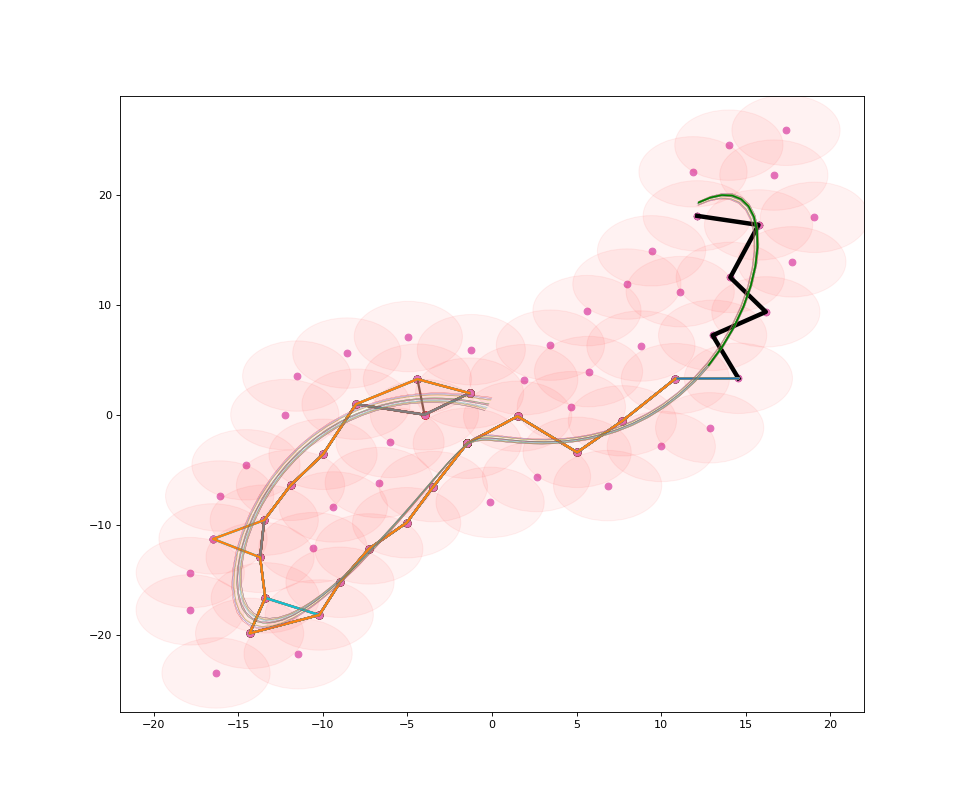

/tmp/ipykernel_29797/2244469961.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


In [32]:
t0 = 1590
t1 = t0 + 15
tpredict = 100
prediction = seer.predict(test_points[t0:t1], tpredict)

fig, ax = seer.draw_prediction()
ax = fig.add_subplot()
ax.plot(test_points[t0:t1,0], test_points[t0:t1,1], c='g')
ax.scatter(lms[:,0], lms[:,1])
for lm in lms:
    crc = plt.Circle(lm, eps, color='r', alpha=0.05)
    ax.add_patch(crc)

    
plt.xlim((-22,22))
plt.ylim((-27,29))
fig.savefig('lorenz_2d_pred_5.pdf', format='pdf')

<IPython.core.display.Javascript object>


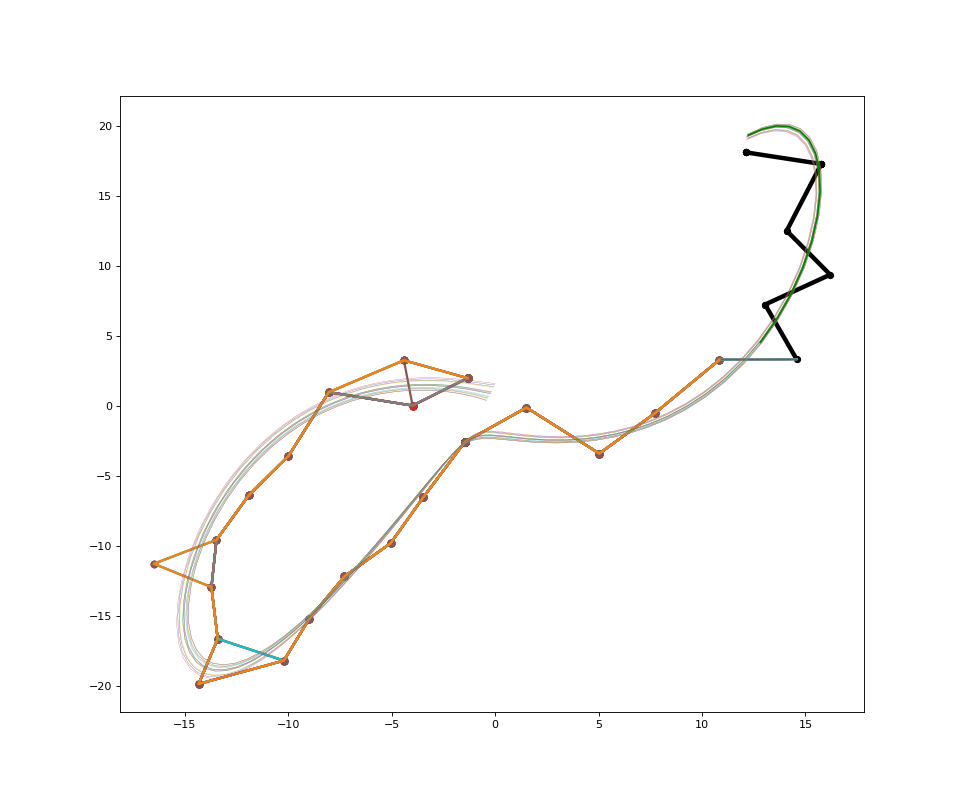

/tmp/ipykernel_29797/178431204.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


In [33]:
t0 = 1590
t1 = t0 + 15
tpredict = 100
prediction = seer.predict(test_points[t0:t1], tpredict)

fig, ax = seer.draw_prediction()
ax = fig.add_subplot()
ax.plot(test_points[t0:t1,0], test_points[t0:t1,1], c='g')
# ax.scatter(lms[:,0], lms[:,1])
# for lm in lms:
#     crc = plt.Circle(lm, eps, color='r', alpha=0.05)
#     ax.add_patch(crc)

    
# plt.xlim((-22,22))
# plt.ylim((-27,29))
fig.savefig('lorenz_2d_pred_6.pdf', format='pdf')

<IPython.core.display.Javascript object>


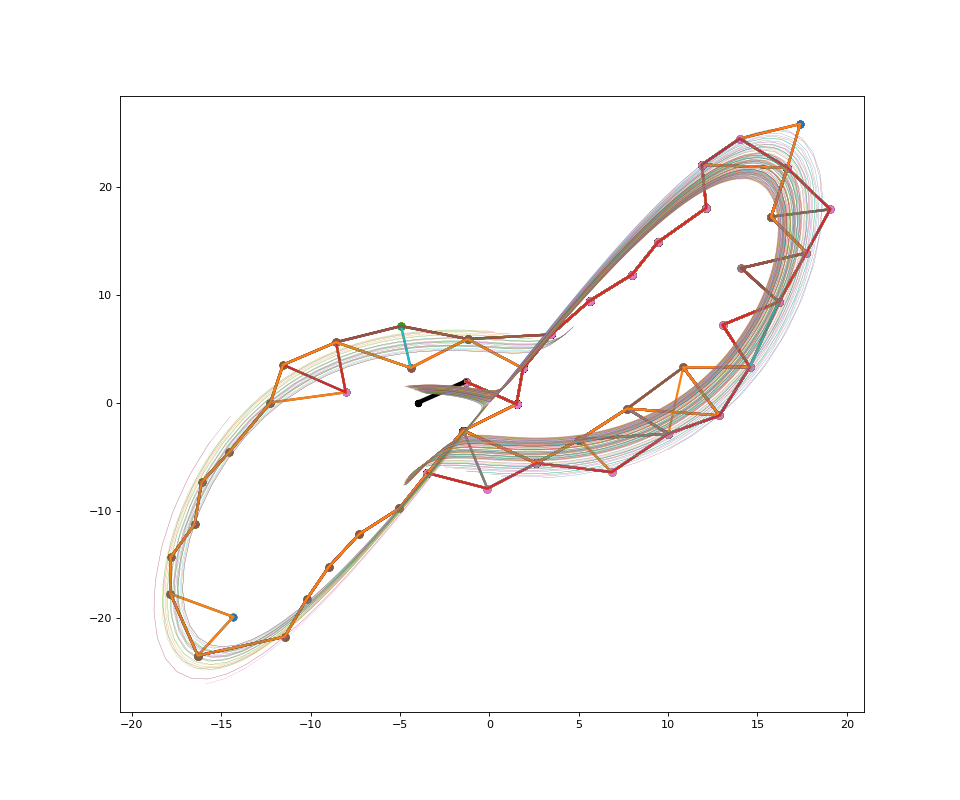

T:  0  components:  1
T:  58  components:  2
T:  61  components:  3
T:  64  components:  6
T:  68  components:  7
T:  70  components:  8
T:  71  components:  9
T:  75  components:  11
T:  77  components:  12
T:  78  components:  13
T:  79  components:  14
T:  82  components:  15
T:  30


<IPython.core.display.Javascript object>


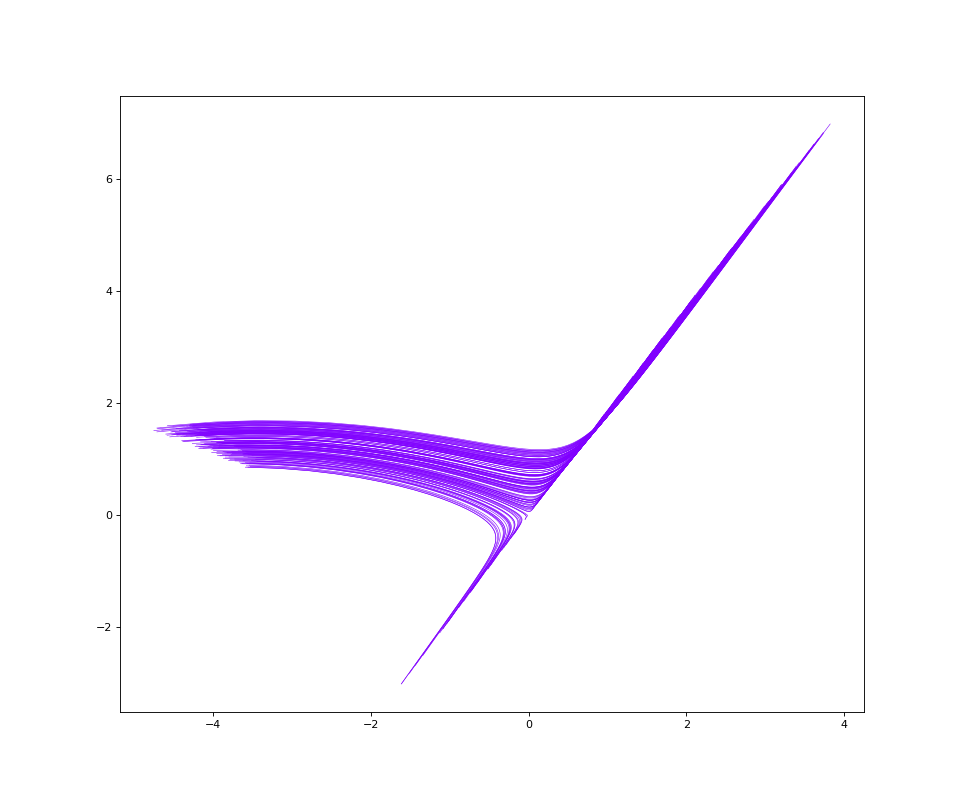

T:  60


<IPython.core.display.Javascript object>


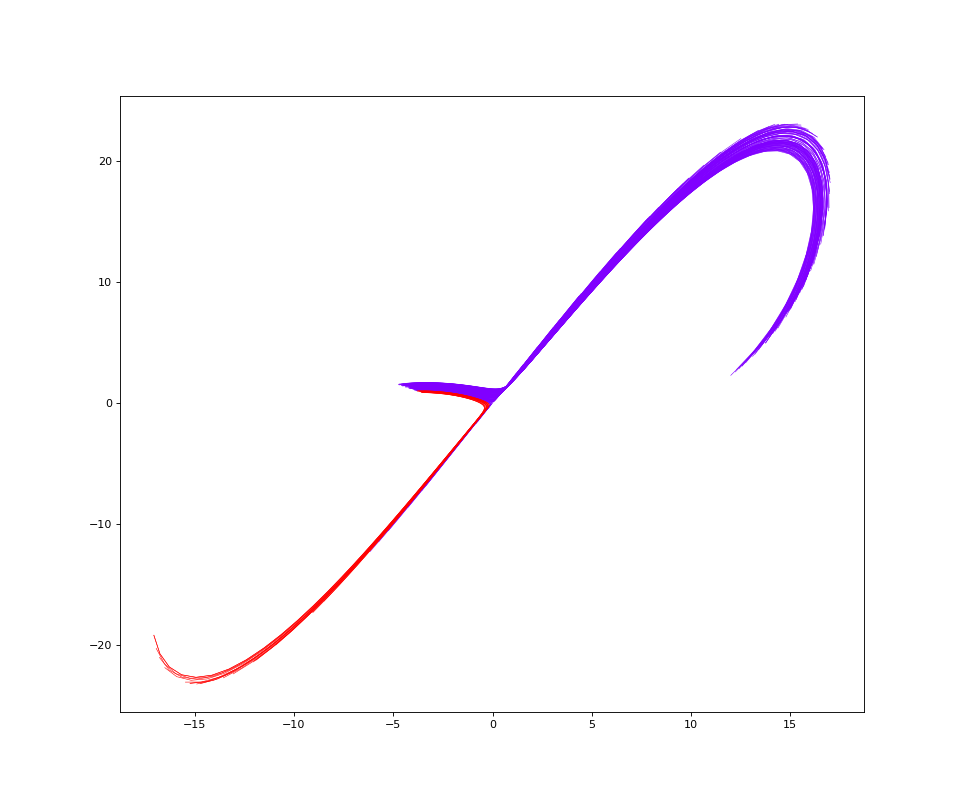

T:  80


<IPython.core.display.Javascript object>


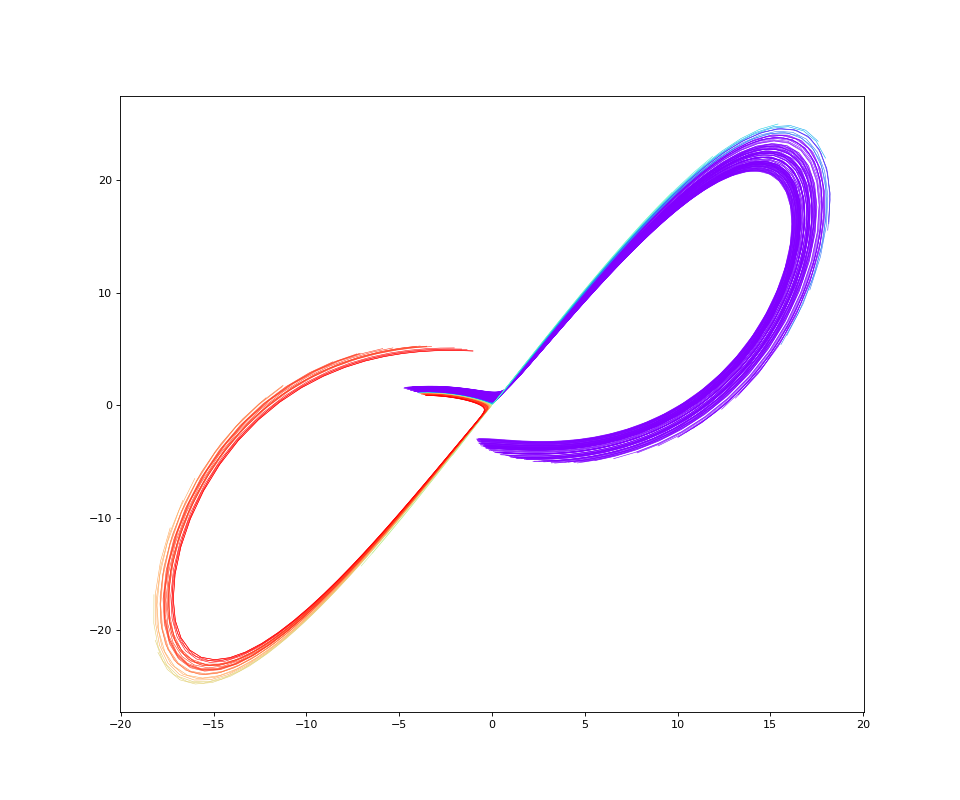

T:  99


<IPython.core.display.Javascript object>


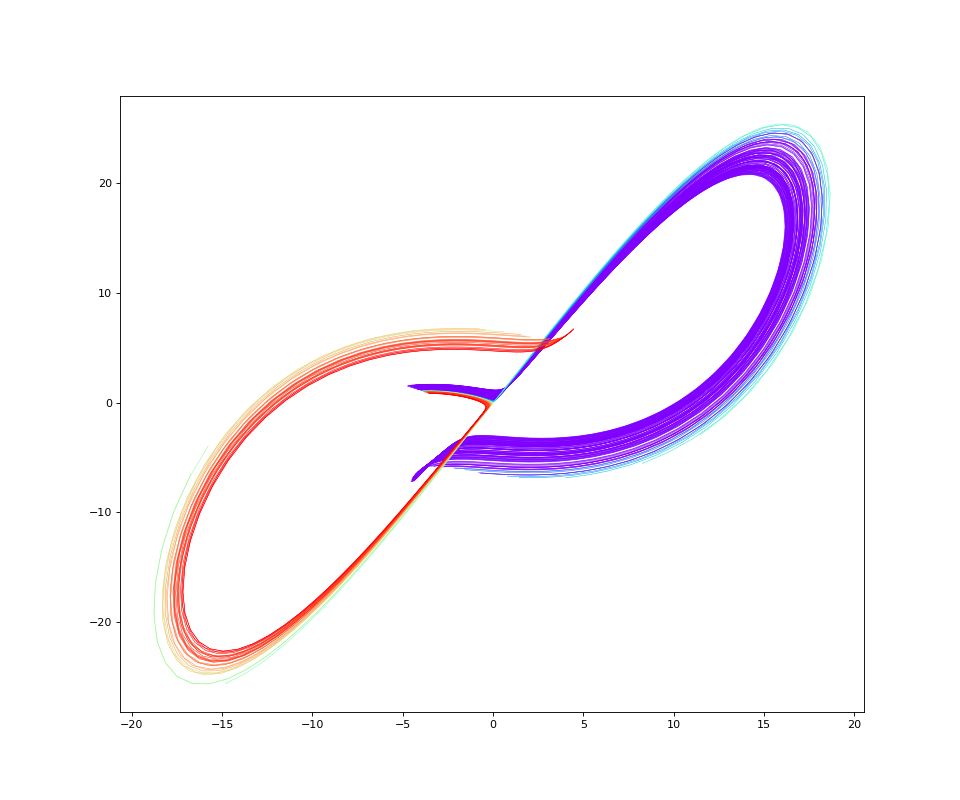

(<Figure size 960x800 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe1c4921bb0>)

In [38]:

t0 = 1690
t1 = t0 + 15
tpredict = 100
prediction = seer.predict(test_points[t0:t1], tpredict)
fig, ax = seer.draw_prediction()


seer.draw_hom_grouped_prediction(nc, steps=[30, 60, 80, tpredict-1], prediction=prediction)